'estimated probability = 13.520000%'

'actual probability = 13.533528%'

'percent error = 0.09996%'

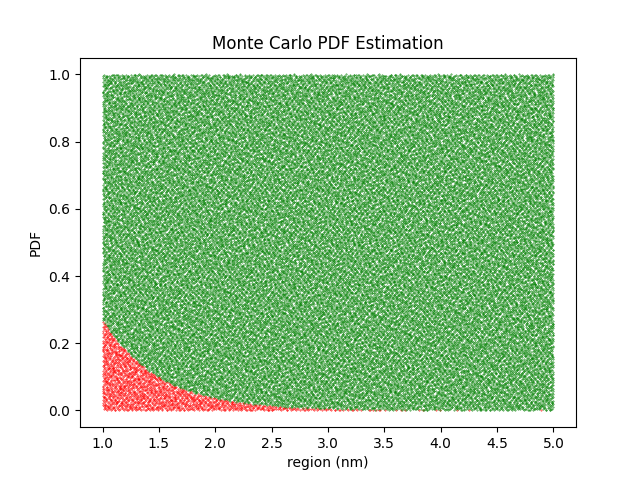

In [1]:
# particle_location.ipynb
# c = sqrt(2)

# Cell 1: use monte carlo estimation to draw the PDF and estimate the probability that the particle will be found
# in the region x >= 1nm. Display the % relative error in estimate

import matplotlib.pyplot as plt
import numpy as np
from numba import float64, vectorize
from scipy.integrate import quad


# halton function
@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p):
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


%matplotlib widget


def main():
    dots = 50_000

    # range [1, 5], [0, 2]
    x = (1 - halton(np.arange(dots), 5)) * 4 + 1
    y = (1 - halton(np.arange(dots), 2)) * 1

    # function to be integrated (exponential distribution function)
    d = y - 2 * np.exp(-2 * x)

    # calculate the points that fall under the function
    x_in = x[d <= 0.0]
    y_in = y[d <= 0.0]
    x_out = x[d > 0.0]
    y_out = y[d > 0.0]

    act = (1 - np.exp(-2 * np.inf)) - (
        1 - np.exp(-2)
    )  # difference in actual from 0 to infinity and from 0 to 1
    # estimation (ratio of dots under curve to all dots)
    est = np.count_nonzero(d <= 0.0) / dots * 4
    err = np.abs((est - act) / act)  # percent error

    # display data
    display(f"estimated probability = {est:.6%}")
    display(f"actual probability = {act:.6%}")
    display(f"percent error = {err:.5%}")

    # plot data
    plt.close("all")
    plt.figure(" ")
    plt.scatter(x_in, y_in, c="r", marker=".", s=0.5)
    plt.scatter(x_out, y_out, c="g", marker=".", s=0.5)
    plt.title("Monte Carlo PDF Estimation")
    plt.xlabel("region (nm)")
    plt.ylabel("PDF")
    plt.show()


main()

In [2]:
# cell 2: use scipy integrate to numerically estimate the same probability as cell 1


def integrand(x):
    return (np.sqrt(2) * np.exp(-x)) ** 2


result, error = quad(integrand, 1, np.inf)

display(f"Probability as calculated by SciPy integrate: {result:.6%}")
display(f"Percent error as calculated by SciPy integrate: {error:.9%}")

'Probability as calculated by SciPy integrate: 13.533528%'

'Percent error as calculated by SciPy integrate: 0.000000002%'